In [1]:
import pandas as pd
import qiime2 as q2
from biom import Table, load_table
import numpy as np
from scipy.stats import ttest_ind

# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [2]:
def lratio(df, n, d):
    lr_ = np.log(df.loc[n, :].sum(0)) - np.log(df.loc[d, :].sum(0))
    lr_[~np.isfinite(lr_)] = np.nan
    return  lr_.values

# import data
bt = load_table('../data/COVID-19/glycogene-table.biom')
btdf = pd.DataFrame(bt.matrix_data.toarray(),
                    bt.ids('observation'),
                    bt.ids())
# import metadata
mf = pd.read_csv('../data/COVID-19/metadata.csv', index_col=0)
mf = mf.reindex(btdf.columns)
# ratios
for num_label in ['heparan sulfate lyase','glucosamine 6-O-sulfatase']:
    num_ = btdf.loc[[num_label], :].sum(0)
    denom_ = btdf.loc[['housekeeping'], :].sum(0)
    lr = np.log(num_) - np.log(denom_)
    lr[~np.isfinite(lr)] = np.nan
    mf[num_label] = lr


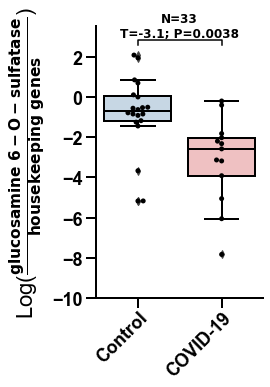

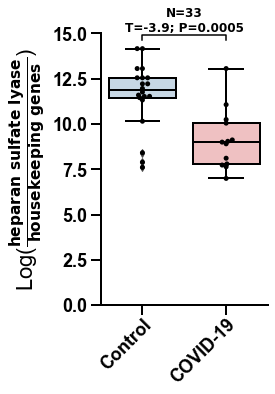

In [3]:
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.linewidth'] = 2
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['xtick.major.pad'] = '.1'

pal_ = {'Control':'#377eb8','COVID-19':'#e41a1c'}

for y_, ytitle_, (ymin,ymax), panel_ in zip(['glucosamine 6-O-sulfatase',
                                             'heparan sulfate lyase'],
                                            [('Log($\\frac{\mathrm{glucosamine\,\,6-O-sulfatase}}'
                                               '{\mathrm{housekeeping\,\,genes}}$)'),
                                            ('Log($\\frac{\mathrm{heparan\,\,sulfate\,\,lyase}}'
                                               '{\mathrm{housekeeping\,\,genes}}$)')],
                                            [(-10,3.5),(0,15)], ['B','C']):


    fig, ax = plt.subplots(1,1, figsize=(3,5))


    sns.swarmplot(y=y_, x='health_status', 
                  data=mf,
                  order=['Control',
                         'COVID-19'],
                  color='black',
                  s=5,
                  ax=ax)
    sns.boxplot(y=y_, x='health_status', 
                  data=mf,
                  order=['Control',
                         'COVID-19'],
                  palette=pal_,
                 ax=ax, linewidth=2)
    for patch in ax.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .3))

    ax.set_facecolor('white')
    ax.set_axisbelow(True)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['top'].set_visible(False)
    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('black')
    ax.tick_params(axis='y', colors='black', width=2, length=10)
    ax.tick_params(axis='x', colors='black', width=2, length=10)
    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=45,
                       horizontalalignment='right',
                       rotation_mode="anchor")
    for tick in ax.get_xticklabels():
        tick.set_fontproperties('arial')
        tick.set_ha("right")
        tick.set_color("black")
        tick.set_fontsize(18)
    for tick in ax.get_yticklabels():
        tick.set_fontproperties('arial')
        tick.set_color("black")
        tick.set_fontsize(18)
    ax.set_ylim(ymin,ymax)

    ax.set_ylabel(ytitle_,
                  fontsize=22,
                  family = 'arial',
                  weight='normal',
                  color='black')
    ax.set_xlabel('',
                  fontsize=22,
                  family = 'arial',
                  weight='normal',
                  color='black')


    max_ = []
    vals_ = [v[y_].dropna().values for k,v in mf.groupby('health_status')]
    stat_, p_ = ttest_ind(vals_[0], vals_[1])
    x1, x2 = 0, 1
    y, h, col = mf[y_].max() + 0.5, .25, 'k'
    ax.plot([x1, x1, x2, x2],
             [y, y+h, y+h, y],
             lw=1.5, c=col)
    if 'e' in str(p_):
        p_ = str(p_)
        p_ = p_[:3] + p_[p_.index('e'):]
        p_ = "N=%i\nT=%.1f; P=%s" % (mf.shape[0],stat_,p_)
    else:
        p_ = "N=%i\nT=%.1f; P=%.4f" % (mf.shape[0],stat_,p_)
    ax.text((x1+x2)*.5, y+h,
             p_, ha='center',fontsize=12,
             va='bottom', color=col)
    plt.setp(ax.artists, edgecolor = 'k')
    plt.setp(ax.lines, color='k')

    plt.savefig('../results/figures/Fig1%s.pdf' % (panel_),
                dpi=1000, 
                bbox_inches='tight',
                facecolor=fig.get_facecolor(), 
                edgecolor='none')

    plt.show()



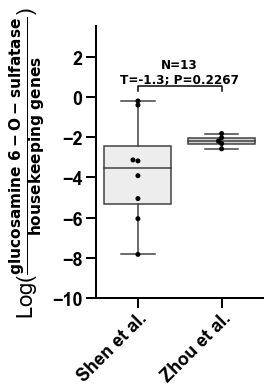

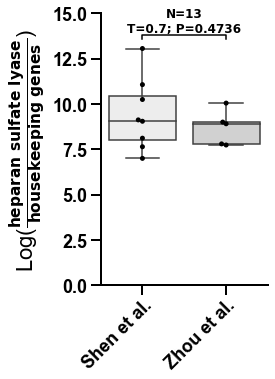

In [4]:
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.linewidth'] = 2
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['xtick.major.pad'] = '.1'

pal_ = {'Control':'#377eb8','COVID-19':'#e41a1c'}

for y_, ytitle_, (ymin,ymax), panel_ in zip(['glucosamine 6-O-sulfatase',
                                             'heparan sulfate lyase'],
                                            [('Log($\\frac{\mathrm{glucosamine\,\,6-O-sulfatase}}'
                                               '{\mathrm{housekeeping\,\,genes}}$)'),
                                            ('Log($\\frac{\mathrm{heparan\,\,sulfate\,\,lyase}}'
                                               '{\mathrm{housekeeping\,\,genes}}$)')],
                                            [(-10,3.5),(0,15)], ['B','C']):


    fig, ax = plt.subplots(1,1, figsize=(3,5))


    lrdf_plot = mf.copy()
    lrdf_plot['study'] = lrdf_plot.study.replace({'PRJCA002202':'Shen et al.',
                                                  'PRJNA605983':'Zhou et al.'})
    lrdf_plot = lrdf_plot[lrdf_plot.health_status == 'COVID-19']

    sns.swarmplot(y=y_, x='study', 
                  data=lrdf_plot,
                  color='black',
                  s=5,
                  ax=ax)
    sns.boxplot(y=y_, x='study', 
                  data=lrdf_plot,
                  palette='Greys',
                 ax=ax)
    for patch in ax.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .3))



    ax.set_facecolor('white')
    ax.set_axisbelow(True)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['top'].set_visible(False)
    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('black')
    ax.tick_params(axis='y', colors='black', width=2, length=10)
    ax.tick_params(axis='x', colors='black', width=2, length=10)
    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=45,
                       horizontalalignment='right',
                       rotation_mode="anchor")
    for tick in ax.get_xticklabels():
        tick.set_fontproperties('arial')
        tick.set_ha("right")
        tick.set_color("black")
        tick.set_fontsize(18)
    for tick in ax.get_yticklabels():
        tick.set_fontproperties('arial')
        tick.set_color("black")
        tick.set_fontsize(18)
    ax.set_ylim(ymin,ymax)

    ax.set_ylabel(ytitle_,
                  fontsize=22,
                  family = 'arial',
                  weight='normal',
                  color='black')
    ax.set_xlabel('',
                  fontsize=22,
                  family = 'arial',
                  weight='normal',
                  color='black')


    max_ = []
    vals_ = [v[y_].dropna().values for k,v in lrdf_plot.groupby('study')]
    stat_, p_ = ttest_ind(vals_[0], vals_[1])
    x1, x2 = 0, 1
    y, h, col = lrdf_plot[y_].max() + 0.5, .25, 'k'
    ax.plot([x1, x1, x2, x2],
             [y, y+h, y+h, y],
             lw=1.5, c=col)
    if 'e' in str(p_):
        p_ = str(p_)
        p_ = p_[:3] + p_[p_.index('e'):]
        p_ = "N=%i\nT=%.1f; P=%s" % (lrdf_plot.shape[0],stat_,p_)
    else:
        p_ = "N=%i\nT=%.1f; P=%.4f" % (lrdf_plot.shape[0],stat_,p_)
    ax.text((x1+x2)*.5, y+h,
             p_, ha='center',fontsize=12,
             va='bottom', color=col)

    plt.savefig('../results/figures/FigS1%s.pdf' % (panel_),
                dpi=1000, 
                bbox_inches='tight',
                facecolor=fig.get_facecolor(), 
                edgecolor='none')

    plt.show()